## K-Nearest Neighbor

* Calcular la distancia entre un punto de prueba y cada instancia de entrenamiento.
* Seleccione los _k_ ejemplos de entrenamiento más cercanos y asigne la categoría del punto de prueba a la categoría más común entre los vecinos más cercanos.
* El voto entre varios vecinos ayuda a disminuir la suceptibilidad al ruido
* Generalmente se usan valores impares de _k_ para evitar empates.
  
  Ejemplo usando los 5 vecinos más cercanos
![title](img/knn1.png "5 vecinos más cercanos")

## Clasificación usando los K-Nearest Neighbors: Función de clasificación implícita

* Aunque no sea necesario calcular explicitamente esta función, las reglas de clasificación aprendidas del conjunto de datos, está basada en regiones del espacio de características.

* A continuación usaremos el algoritmo de K-Nearest Neighbors para clasificar los datos del conjunto IRIS. El algoritmo de clasificación está implementado en sklearn *_(pip3 install sklearn)_*. Aquí podemos ver las regiones de clasificación en el espacio de 2 dimensiones para este conjunto de datos.



In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

Automatically created module for IPython interactive environment


ImportError: No module named 'matplotlib'

### Indexamiento eficiente

* La búsqueda exahustiva para encontrar los vecinos más cercanos no es eficiente para conjuntos de datos grandes.
* Indexar las estructuras(datos), puede acelarar la velocidad de las evaluaciones
* Para la _distancia euclidiana_, un **__kd-tree__** puede ser construido para que redusca el tiempo esperado en la búsqueda de los vecinos más cercanos. De esta forma, en lugar de realizar __n__ búsquedas, el algoritmo solo debe realizar al rededor de __O(log n)__ comparaciones.
* Otros tipos de indexamiento son posibles para otras métricas o datos de tipo texto(string)
  - Índice invertido para recuperación de text

## Regresión usando K-Nearest Neighbors

* Este tipo de aprendizaje también puede ser usado para estimar valores de funciones de codominio real (regresión), tomando el promedio de los k vecinos más cercanos al punto de prueba. 
* También es posible usar todos los ejemplos del conjunto de entrenamiento para ayudar en la regresión, dejando que cada instancia contribuya con su valor, pesado por el inverso de la distancia al cuadrado de cada instancia al punto de prueba.

En este ejemplo, veremos el uso de este algoritmo para realizar una regresión sobre un conjunto de datos artificial. Se debe usar regresión cuando el objetivo es una variable continua en lugar de una variable discreta.

Automatically created module for IPython interactive environment


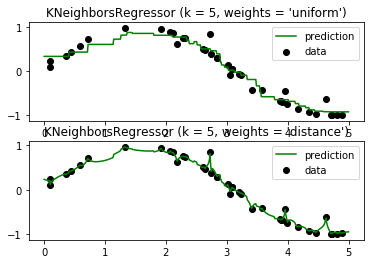

In [7]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
# License: BSD 3 clause (C) INRIA

# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## Relevancia de características y peso

* Las medidas estándares dan igual peso a todas las características
  - Es problematico si varias caracteristicas son irrelevantes, dado que el promedio usando ejemplos irrelevantes puede engañar al clasificador.
* Las características pueden ser pesadas usando algúna medida de que tanto puede cada característica discriminar la categoría de un ejemplo por si sola. Por ejemplo _information gain_
* En general, los métodos basados en instancias (IBL) favorecen la similitud global sobre el concepto de _simplicidad_

## Reglas e Instancias en el sesgo del aprendizaje humano

* Experimentos psicológicos han mostrado que personas de diferentes culturas, tienen sesgos distintos cuando deben categorizar.
* Los "occidentales" favorecen las reglas simples.
* Los "asiáticos" favorecen el concepto de similitud global.

En en que grupo clasificarian la flor de la siguiente imagen:

![title](img/ibl.png "ejemplo")


## Algunas consideraciones

* Se puede reducir el almacemiento de instancias de entrenamiento, si se eligen instancias _"representativas"_
  - Por ejemplo las máquinas de vectores (SVM) de soporte son algo parecido
* Se puede hybridizar con métodos basados en reglas o redes neuronales
* Puede ser usado para datos de tipo muy complejo, como grafos, solo se necesita una forma de medir distancias entre los objetos
* Puede ser usado en problemas diferentes a la clasificación y la regresión
  - Planeamiento basado en casos
  - Rasonamiento basado en casos en leyes y negocios

# Conclusiones

* Los métodos basados en instancias (IBL) trabajan usando el concepto de distancia a un conjunto específico de instancias de entrenamiento, en lugar de tratar de aprender modelos generalizadores.
* Típicamente, el tiempo de entrenamiento es corto, pero el tiempo de evaluación es largo